# STEP #0 PROBLEM STATEMENT

CIFAR-10 is a dataset that consists of several images divided into 10 classes
0. Airplanes
1. Cars
2. Birds
3. Cats
4. Deer
5. Dogs
6. Frogs
7. Horses
8. Ships
9. Trucks

It is widely used for machine learning and computer vision applications.

Data Source: https://www.cs.toronto.edu/~kris/cifar.html

# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape #50000 samples, 32x32x3 (width x height x channels)

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape #the category

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[8]


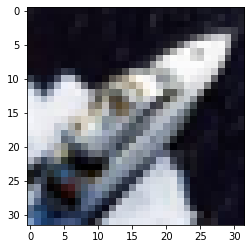

In [7]:
i = 20000
plt.imshow(X_train[i])
print(y_train[i])

/Users/adheenachacko/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


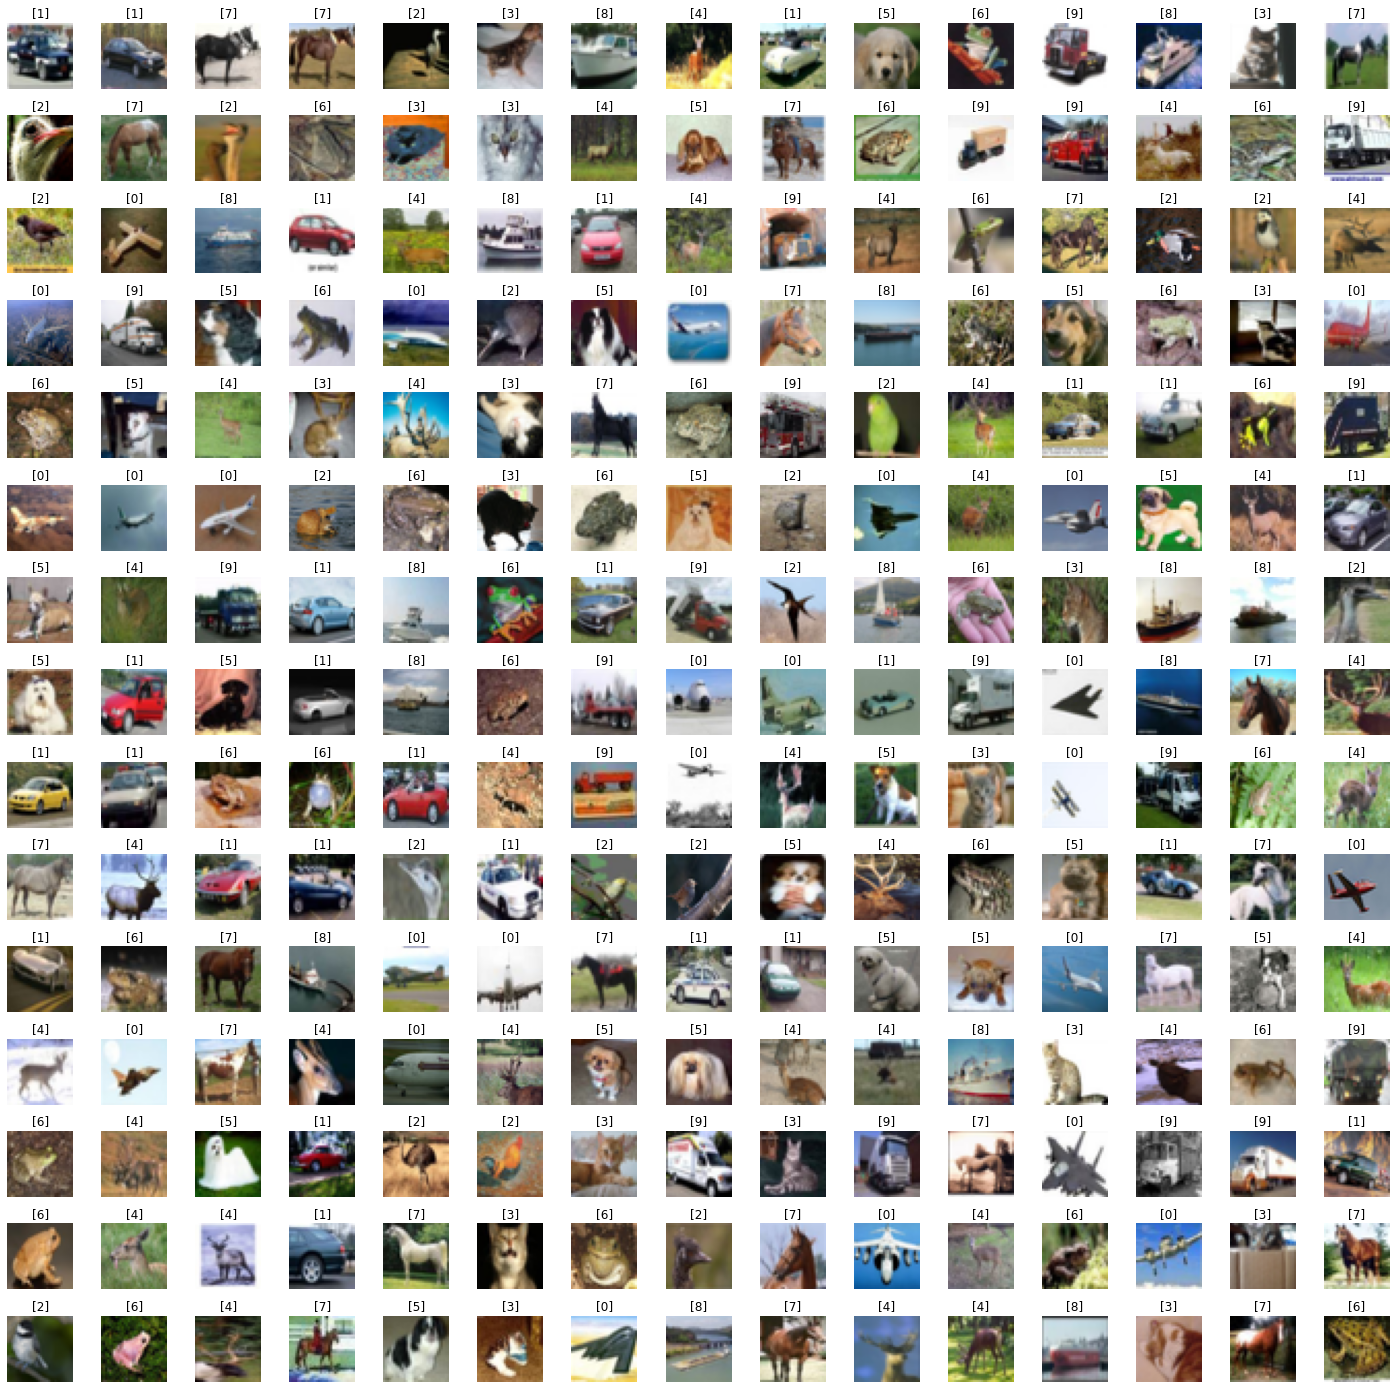

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid): #adding images to the grid
    index = np.random.randint(0, n_training) #pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) #add category as title for each
    axes[i].axis('off') #hide axes
plt.subplots_adjust(hspace = 0.4)

In [9]:
n_training


50000

# STEP #3: DATA PREPARATION

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [14]:
y_train #changed to binary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
X_train = X_train/255 # we want it to be decimal values between 0 and 1
X_test=X_test/255

In [17]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
Input_shape = X_train.shape[1:]

In [20]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [21]:
#build our model in a sequential (lagel) format
#keras is an API that lets us build models easily
from keras.models import Sequential #build model from left to right (convolutions)
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam #perform optimization
from keras.callbacks import TensorBoard 

In [22]:
cnn_model = Sequential() #instantiate sequential model
cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', input_shape = Input_shape)) #adding first layer
cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu')) #output from previous layer is the input for this layer
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu')) #creating the neural network
cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation='softmax')) #can't use relu, softmax is better for our purposes

In [23]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [24]:
#fit out training data to our model
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 198s 126ms/step - loss: 1.5979 - accuracy: 0.4290
Epoch 2/2
1563/1563 [==============================] - 219s 140ms/step - loss: 1.1845 - accuracy: 0.5941


# STEP #5: EVALUATE THE MODEL

In [25]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 7s 21ms/step - loss: 1.0792 - accuracy: 0.6426
Test Accuracy: 0.6425999999046326


In [26]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 1, 7])

In [27]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [28]:
y_test = y_test.argmax(1)

In [29]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

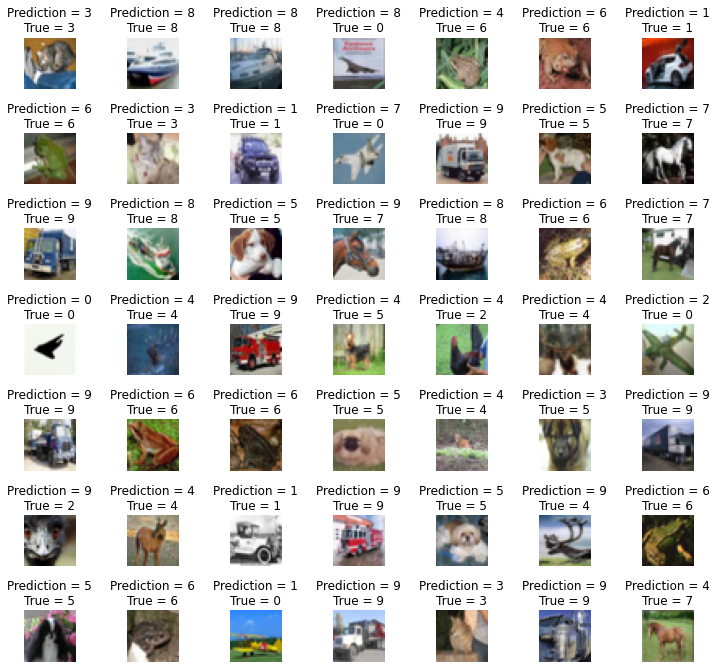

In [31]:
L = 7
W = 7
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)



In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)

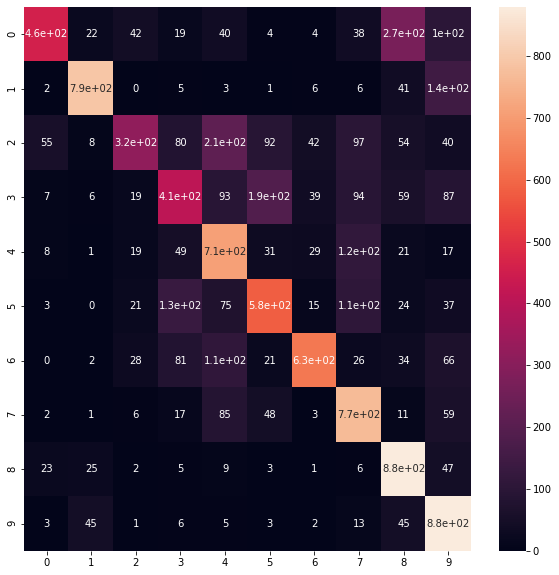

In [34]:
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)

# STEP #6: SAVING THE MODEL

In [35]:
import os
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7.1: DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [40]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [41]:
X_train = X_train.astype('float32')
X_test=X_test.astype('float32')

In [42]:
X_train.shape

(50000, 32, 32, 3)

In [43]:
X_test.shape

(10000, 32, 32, 3)

In [45]:
n = 8
X_train_sample = X_train[:n]

In [46]:
X_train_sample.shape

(8, 32, 32, 3)

In [47]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train_sample)

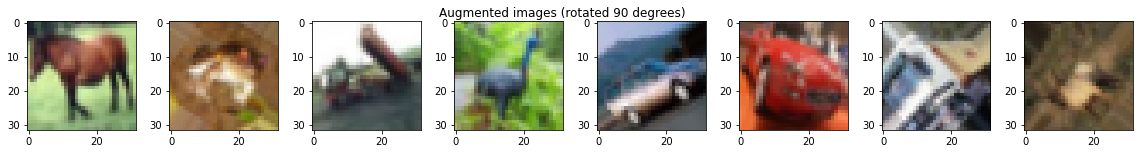

In [51]:
from PIL import Image


fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size= n):
    for i in range(0,n):
        ax = fig.add_subplot(1,n,i+1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break;